# Selection Verification

Notebook to visualize and study the data involved in the selection cuts.

---

In [152]:
import ROOT as rt
from ROOT import TH1F,TH1I,TH1D,TH2F,TGraph,TLegend
import uproot
import numpy as np
import matplotlib.pyplot as plt
import os

In [153]:
''' Helper functions '''

def open_root_file(sel_file, tree_name):
    '''
        Get the Selection 
        return: Selection Tree
    '''
    # MC tree
    sel_tree = sel_file.Get(tree_name)

    print("Opened MC file", sel_file)
    
    return sel_tree

# Helper to set the histogram colors
def set_hist_colors(hist, lcolor, fcolor):
    hist.SetLineColor(lcolor)
    hist.SetFillColor(fcolor)
    
def set_hist_lim(hist):
    hist.SetAxisRange(0, 2, "X")
    
def print_count(count):
    for p in count: 
        print(p, ":", count[p])
        
def print_cut_report(pdg, total, passed):
    print(f"{pdg}: (passed/total = {passed}/{total})  (Eff = {100 * (passed/total):.1f}%)")
    
# Function to set legend template for right-side of canvas
def legend_init_right():
    legend = TLegend(.65,.65,.85,.85)
    legend.SetBorderSize(0)
    legend.SetFillColor(0)
    legend.SetFillStyle(0)
    legend.SetTextFont(42)
    legend.SetTextSize(0.030)
    
    return legend

# Function to set legend template for left-side of canvas
def legend_init_left():
    legend = TLegend(.15,.65,.35,.85)
    legend.SetBorderSize(0)
    legend.SetFillColor(0)
    legend.SetFillStyle(0)
    legend.SetTextFont(42)
    legend.SetTextSize(0.030)
    
    return legend

def hist_help(file, hist, color, fill=True):
    h = file.Get(hist)
    h.SetLineColor(color)
    h.SetFillColor(color)
    if not fill: 
        h.SetFillColor(False)
    return h
 
color_text = '\033[31mpositron : light_red\033[0m, \033[34m electron : blue \033[0m, \033[32m proton : green \033[0m, \033[35m pion : magenta \033[0m, muon : black'
colors = {'positron': 46, 'electron': 61, 'proton': 8, 'pion': 64, 'muon': 38, 'gamma': 45, 'other': 29}

## Beam & Daughter $<PIDA>$ 
    
- **Question:** Can we use $<PIDA>$ to separate daughter protons and pions?

- **Motivation:** We want to know if there is a $\pi^{\pm}$ in the final state so we can reject them. We only want $\pi^0$ + $N$ in the final state.
    
To do particle identification (PID) we can use the average PIDA method. This works by fitting the function 
    $$ A = \frac{dE}{dx}R^{-0.42} $$
to the particle track's dE/dx and residual range ($R$) curve. Each particle has a different curve in this space with a distinguishable difference between protons, pions and kaons. Unfortunately, pions and muons have very similar curves and therefore are indistinguishable using this method.

In [154]:
selection_file  = '/Users/jsen/tmp/pion_qe/studies/pi0_event_selection_study/build/out.root'
sel_file  = rt.TFile.Open(selection_file, 'read')
sel_tree = sel_file.Get("beam_avg_pida_e")

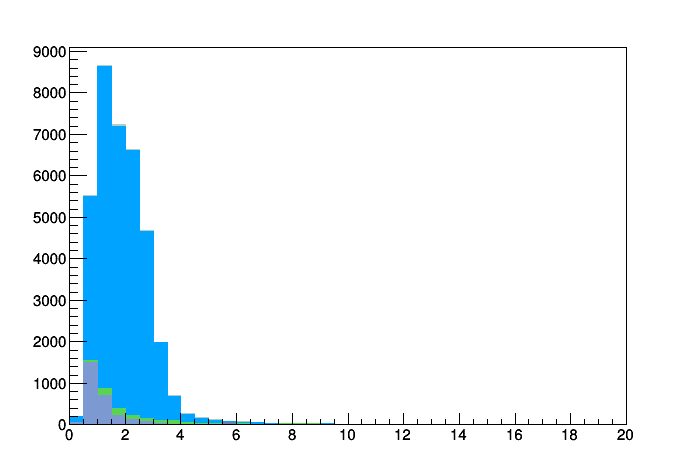

In [155]:
c = rt.TCanvas()

stack = rt.THStack()

hm = hist_help(sel_file,"beam_avg_pida_mu", colors["muon"])
stack.Add(hm)

hp = hist_help(sel_file,"beam_avg_pida_p", colors["proton"])
stack.Add(hp)

he = hist_help(sel_file,"beam_avg_pida_e", colors["positron"])
stack.Add(he)

hpi = hist_help(sel_file,"beam_avg_pida_pi", colors["pion"])
stack.Add(hpi)

ho = hist_help(sel_file,"beam_avg_pida_other", colors["other"])
stack.Add(ho)

stack.Draw()

c.Draw()

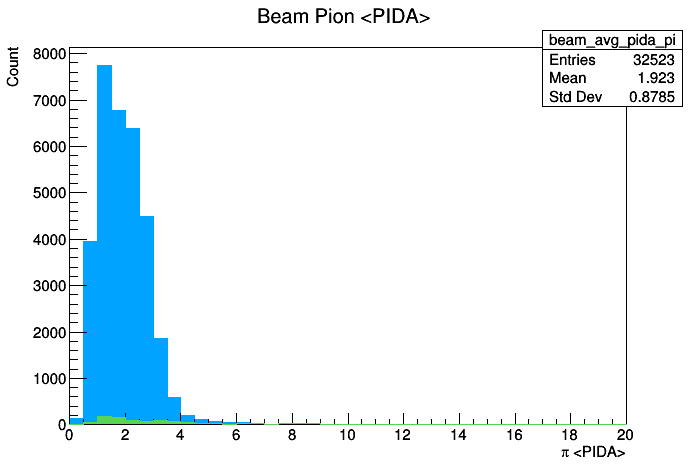

In [156]:
c = rt.TCanvas()

hpi = hist_help(sel_file,"beam_avg_pida_pi", colors["pion"])
hpi.Draw("SAME")

hp = hist_help(sel_file,"beam_avg_pida_p", colors["proton"])
hp.Draw("SAME")

c.Draw()

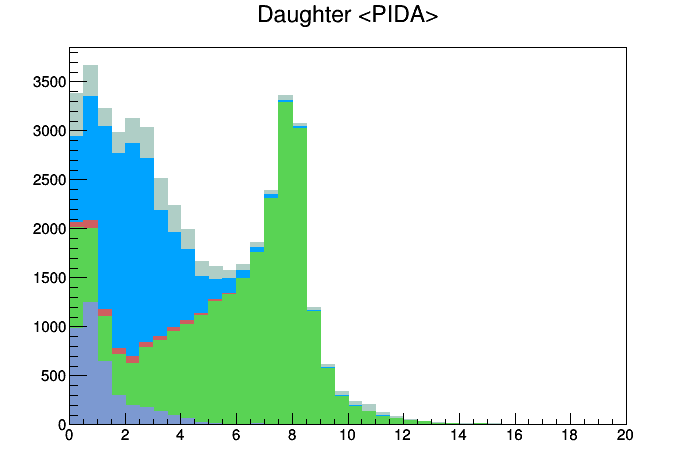

In [157]:
c = rt.TCanvas()

stack = rt.THStack()

hm = hist_help(sel_file,"daughter_avg_pida_mu", colors["muon"])
stack.Add(hm)

hp = hist_help(sel_file,"daughter_avg_pida_p", colors["proton"])
stack.Add(hp)

he = hist_help(sel_file,"daughter_avg_pida_e", colors["positron"])
stack.Add(he)

hpi = hist_help(sel_file,"daughter_avg_pida_pi", colors["pion"])
stack.Add(hpi)

ho = hist_help(sel_file,"daughter_avg_pida_other", colors["other"])
stack.Add(ho)

stack.Draw()
stack.SetTitle("Daughter <PIDA>")

c.Draw()

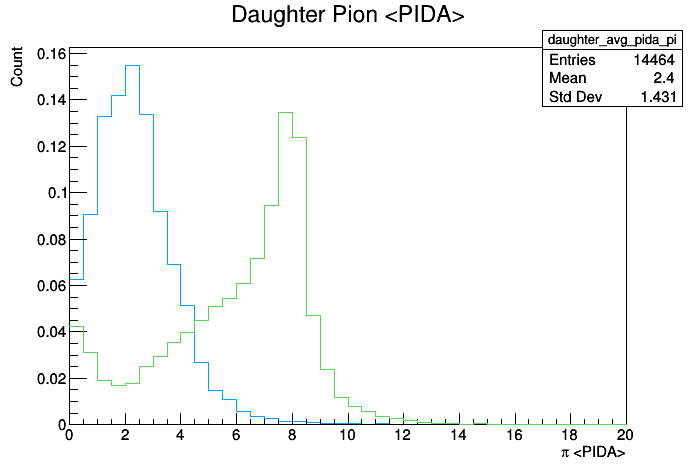

In [158]:
c = rt.TCanvas()

hpi = hist_help(sel_file,"daughter_avg_pida_pi", colors["pion"], False)
hpi.Scale(1./hpi.Integral())
hpi_cum = hpi.GetCumulative()
hpi.Draw("SAME;HIST")

hp = hist_help(sel_file,"daughter_avg_pida_p", colors["proton"], False)
hp.Scale(1./hp.Integral())
hp_cum = hp.GetCumulative()
hp.Draw("SAME;HIST")

c.Draw()

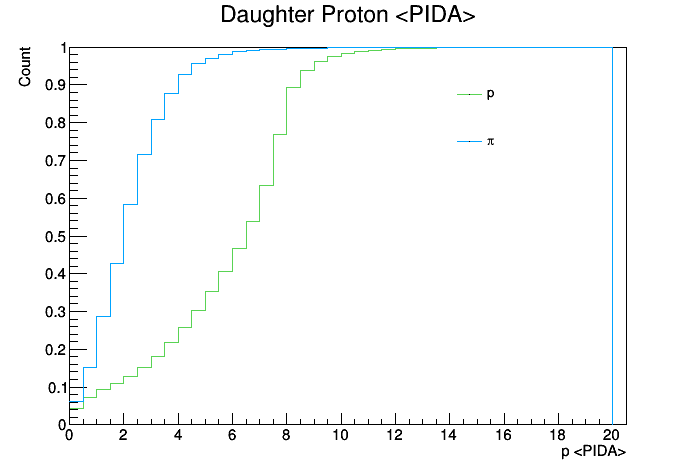

In [159]:
c = rt.TCanvas()

leg = legend_init_right()

hp_cum.GetYaxis().SetRangeUser(0,1)
hp_cum.GetXaxis().SetRangeUser(0,600)

hp_cum.Draw("SAME")
hp_cum.SetStats(False)

hpi_cum.Draw("SAME")
hpi_cum.SetStats(False)

leg.AddEntry(hp_cum,"p")
leg.AddEntry(hpi_cum,"#pi")

leg.Draw()
c.Draw()

23770.0


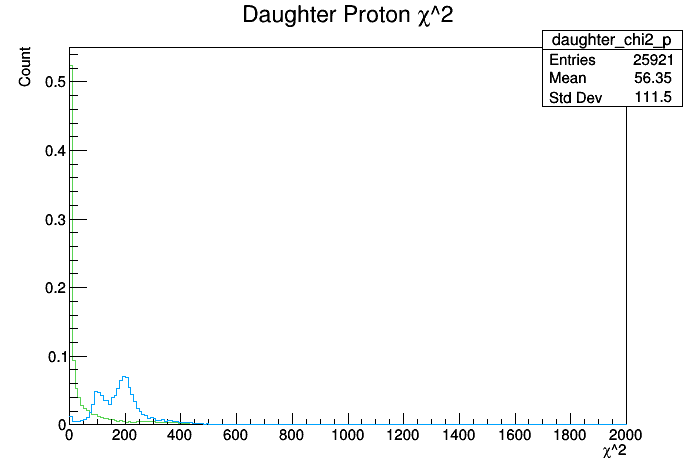

In [160]:
c = rt.TCanvas()

hp = hist_help(sel_file, "daughter_chi2_p", colors["proton"], False)
print(hp.Integral())
hp.Scale(1./hp.Integral())
hp_cum = hp.GetCumulative()
hp.Draw("SAME;HIST")

hpi = hist_help(sel_file, "daughter_chi2_pip", colors["pion"], False)
hpi.Scale(1./hpi.Integral())
hpi_cum = hpi.GetCumulative()
hpi.Draw("SAME:HIST")

c.Draw()

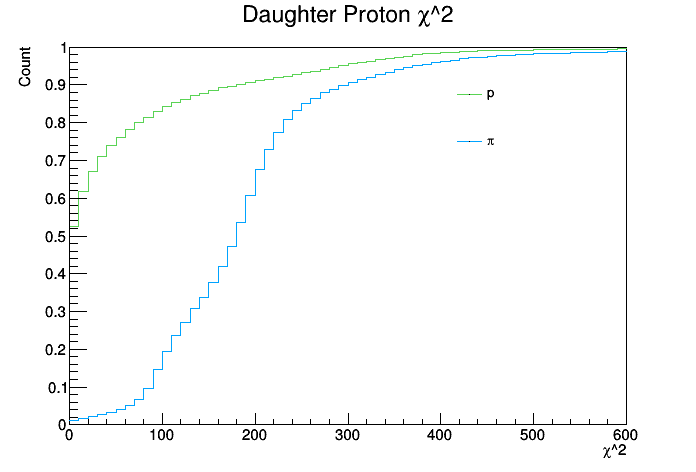

In [161]:
c = rt.TCanvas()

leg = legend_init_right()

hp_cum.GetYaxis().SetRangeUser(0,1)
hp_cum.GetXaxis().SetRangeUser(0,600)

hp_cum.Draw("SAME")
hp_cum.SetStats(False)

hpi_cum.Draw("SAME")
hpi_cum.SetStats(False)

leg.AddEntry(hp_cum,"p")
leg.AddEntry(hpi_cum,"#pi")

leg.Draw()
c.Draw()

**Note:** in above plot the $\mu$ and $\pi$ overlap as expected. There are many muons so we have to find a way to reject them.


Try using Ajib's Michel CNN classifier to help reject muons.

In [3]:
pionana_file  = '/Users/jsen/tmp/pion_qe/pionana_Prod4_mc_1GeV_1_14_21.root'
tree_name = 'pionana/beamana'
ofile  = rt.TFile.Open(pionana_file, 'read')
ptree = open_root_file(ofile, tree_name)
print("Number Entries:", ptree.GetEntries())

Opened MC file Name: /Users/jsen/tmp/pion_qe/pionana_Prod4_mc_1GeV_1_14_21.root Title: 
Number Entries: 228336


In [5]:
true_cex_def = " && true_beam_endProcess==\"pi+Inelastic\" && true_daughter_nPi0>0 && true_daughter_nPiMinus==0 && true_daughter_nPiPlus==0 "

tof_cut = " && beam_inst_TOF > 95.8 && beam_inst_TOF < 97 "

beam_tpc_cut = " && reco_beam_passes_beam_cuts==1 "

endz_cut = " && reco_beam_calo_endZ<222 "

track_score = " && reco_daughter_PFP_trackScore_collection>0.3 "

positron : 105945
electron : 0
proton : 41350
pion : 39320
muon : 34783
other : 6938
positron : light_red,  electron : blue ,  proton : green ,  pion : magenta , muon : black


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


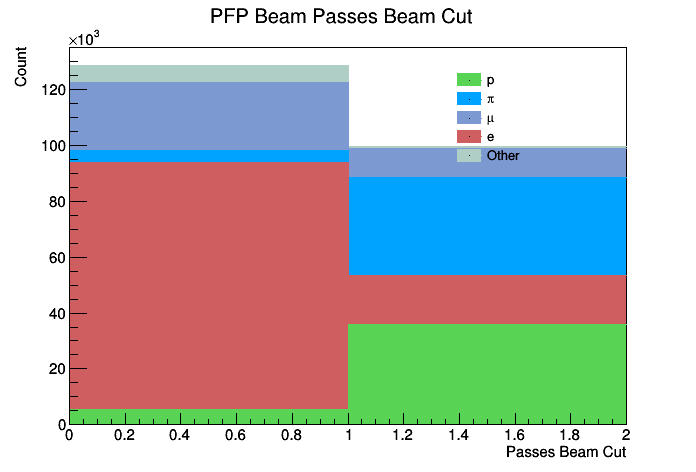

In [27]:
# reco_beam_passes_beam_cuts
count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 2
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 0, 2 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 0, 2 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 0, 2 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 0, 2 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 0, 2 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_beam_passes_beam_cuts >> h1b","reco_beam_true_byHits_PDG==2212 && reco_beam_passes_beam_cuts > -1")
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_beam_passes_beam_cuts >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11) && reco_beam_passes_beam_cuts > -1")
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_beam_passes_beam_cuts >> h3b","reco_beam_true_byHits_PDG==211 && reco_beam_passes_beam_cuts > -1")
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_beam_passes_beam_cuts >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13) && reco_beam_passes_beam_cuts > -1")
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_beam_passes_beam_cuts >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212 && reco_beam_passes_beam_cuts > -1")
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("Passes Beam Cut")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("PFP Beam Passes Beam Cut")


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

print(color_text)

positron : 105945
electron : 0
proton : 41350
pion : 39320
muon : 34783
other : 6938
positron : light_red,  electron : blue ,  proton : green ,  pion : magenta , muon : black


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


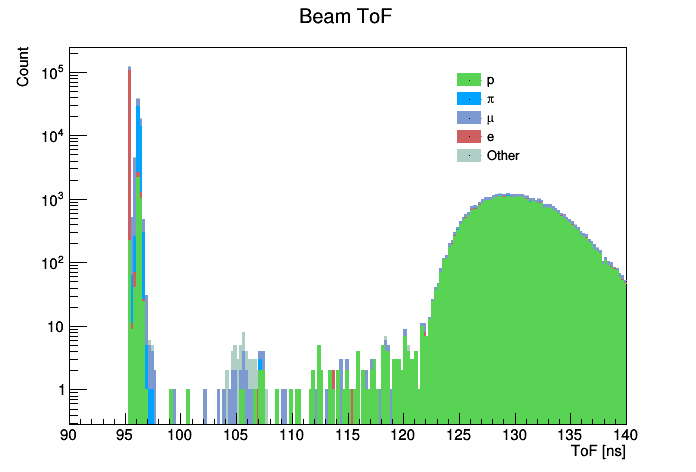

In [13]:
# beam_inst_TOF
count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 200
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 90.0, 140.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 90.0, 140.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 90.0, 140.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 90.0, 140.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 90.0, 140.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("beam_inst_TOF >> h1b","reco_beam_true_byHits_PDG==2212 && beam_inst_TOF > -1")
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("beam_inst_TOF >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11) && beam_inst_TOF > -1")
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("beam_inst_TOF >> h3b","reco_beam_true_byHits_PDG==211 && beam_inst_TOF > -1")
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("beam_inst_TOF >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13) && beam_inst_TOF > -1")
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("beam_inst_TOF >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212 && beam_inst_TOF > -1")
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("ToF [ns]")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Beam ToF")
stacks.SetMinimum(1)


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

print(color_text)

positron : 630
electron : 0
proton : 3310
pion : 39013
muon : 15859
other : 2690
positron : light_red,  electron : blue ,  proton : green ,  pion : magenta , muon : black


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


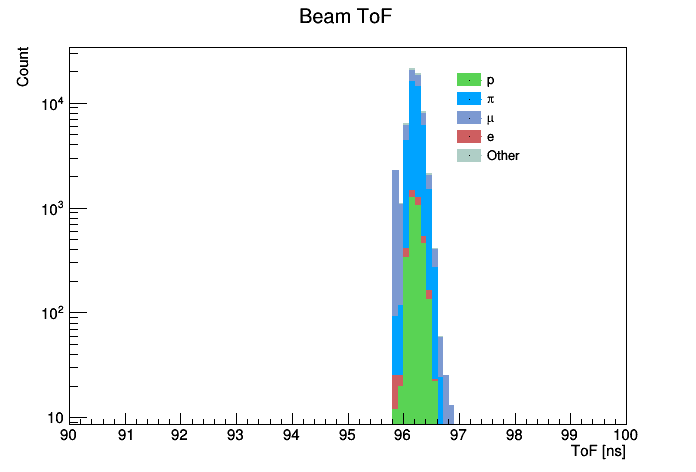

In [15]:
# beam_inst_TOF

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 100
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 90.0, 100.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 90.0, 100.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 90.0, 100.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 90.0, 100.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 90.0, 100.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("beam_inst_TOF >> h1b","reco_beam_true_byHits_PDG==2212" + tof_cut)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("beam_inst_TOF >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11)" + tof_cut)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("beam_inst_TOF >> h3b","reco_beam_true_byHits_PDG==211" + tof_cut)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("beam_inst_TOF >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13)" + tof_cut)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("beam_inst_TOF >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212" + tof_cut)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("ToF [ns]")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Beam ToF")


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

print(color_text)

positron : 630
electron : 0
proton : 3310
pion : 39013
muon : 15859
other : 2690
positron : light_red,  electron : blue ,  proton : green ,  pion : magenta , muon : black


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


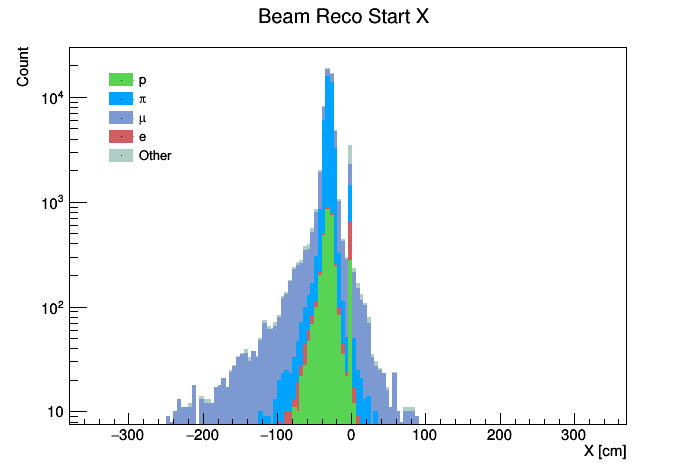

In [72]:
''' Reco Beam Start X (SCE-corrected + Calibrated) '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 150
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, -380.0, 370.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, -380.0, 370.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, -380.0, 370.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, -380.0, 370.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, -380.0, 370.0 )

c = rt.TCanvas()
leg = legend_init_left()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_beam_calo_startX >> h1b","reco_beam_true_byHits_PDG==2212" + tof_cut)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_beam_calo_startX >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11)" + tof_cut)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_beam_calo_startX >> h3b","reco_beam_true_byHits_PDG==211" + tof_cut)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_beam_calo_startX >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13)" + tof_cut)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_beam_calo_startX >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212" + tof_cut)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("X [cm]")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Beam Reco Start X")


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

print(color_text)

positron : 630
electron : 0
proton : 3310
pion : 39013
muon : 15859
other : 2690
positron : light_red,  electron : blue ,  proton : green ,  pion : magenta , muon : black


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


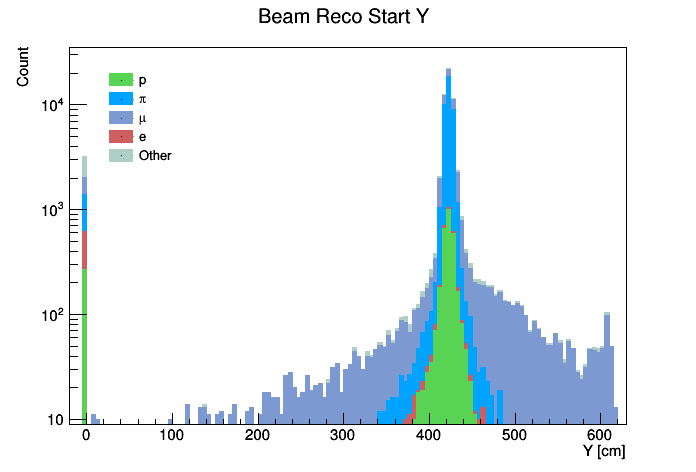

In [73]:
''' Reco Beam Start Y (SCE-corrected + Calibrated) '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 130
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, -20.0, 630.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, -20.0, 630.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, -20.0, 630.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, -20.0, 630.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, -20.0, 630.0 )

c = rt.TCanvas()
leg = legend_init_left()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_beam_calo_startY >> h1b","reco_beam_true_byHits_PDG==2212" + tof_cut)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_beam_calo_startY >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11)" + tof_cut)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_beam_calo_startY >> h3b","reco_beam_true_byHits_PDG==211" + tof_cut)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_beam_calo_startY >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13)" + tof_cut)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_beam_calo_startY >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212" + tof_cut)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("Y [cm]")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Beam Reco Start Y")


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

print(color_text)

positron : 630
electron : 0
proton : 3310
pion : 39013
muon : 15859
other : 2690
positron : light_red,  electron : blue ,  proton : green ,  pion : magenta , muon : black


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


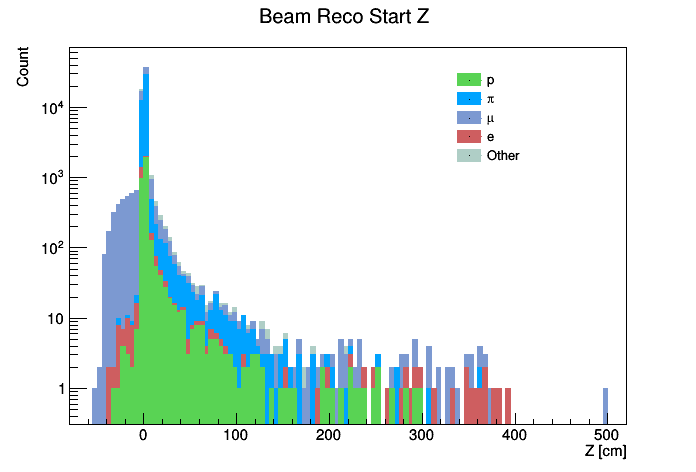

In [16]:
''' Reco Beam Start Z (SCE-corrected + Calibrated) '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 120
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, -80.0, 520.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, -80.0, 520.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, -80.0, 520.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, -80.0, 520.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, -80.0, 520.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_beam_calo_startZ >> h1b","reco_beam_true_byHits_PDG==2212" + tof_cut)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_beam_calo_startZ >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11)" + tof_cut)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_beam_calo_startZ >> h3b","reco_beam_true_byHits_PDG==211" + tof_cut)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_beam_calo_startZ >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13)" + tof_cut)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_beam_calo_startZ >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212" + tof_cut)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("Z [cm]")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Beam Reco Start Z")
stacks.SetMinimum(1)


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

print(color_text)

positron : 14
electron : 0
proton : 1067
pion : 35024
muon : 8974
other : 403
positron : light_red,  electron : blue ,  proton : green ,  pion : magenta , muon : black


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


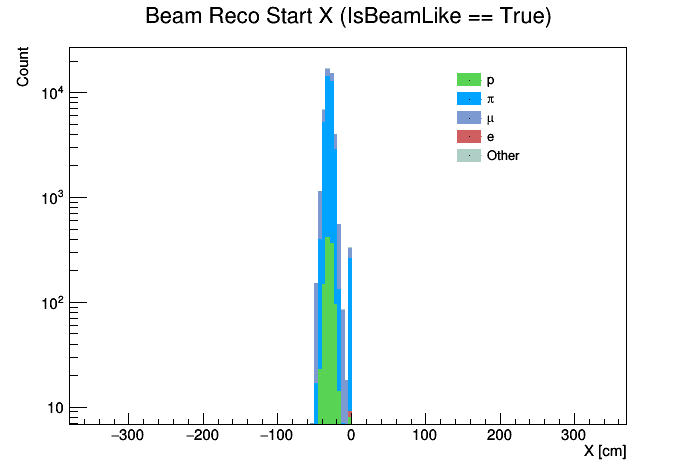

In [18]:
''' Reco Beam Start X (SCE-corrected + Calibrated), remove events in X = [-3,0] ie IsBeamLike==1 '''


count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 150
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, -380.0, 370.0)
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, -380.0, 370.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, -380.0, 370.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, -380.0, 370.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, -380.0, 370.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_beam_calo_startX >> h1b","reco_beam_true_byHits_PDG==2212" + tof_cut + beam_tpc_cut)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_beam_calo_startX >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11)" + tof_cut + beam_tpc_cut)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_beam_calo_startX >> h3b","reco_beam_true_byHits_PDG==211" + tof_cut + beam_tpc_cut)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_beam_calo_startX >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13)" + tof_cut + beam_tpc_cut)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_beam_calo_startX >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212" + tof_cut + beam_tpc_cut)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("X [cm]")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Beam Reco Start X (IsBeamLike == True)")


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

print(color_text)

positron : 14
electron : 0
proton : 1067
pion : 35024
muon : 8974
other : 403
positron : light_red,  electron : blue ,  proton : green ,  pion : magenta , muon : black


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


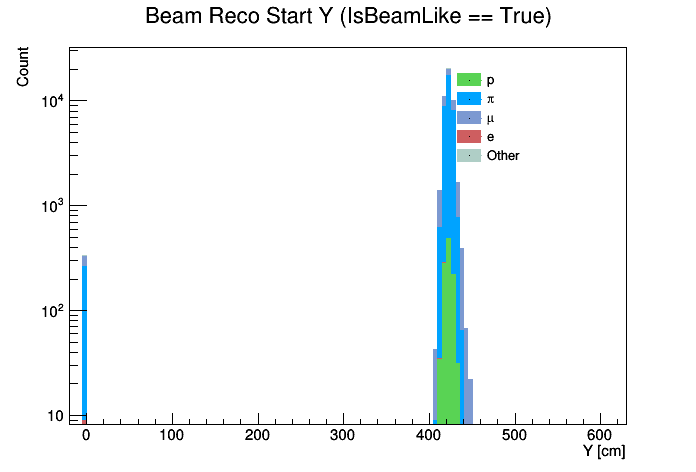

In [79]:
''' Reco Beam Start Y (SCE-corrected + Calibrated), remove events in Y = [-1,2] ie IsBeamLike==1 '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 130
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, -20.0, 630.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, -20.0, 630.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, -20.0, 630.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, -20.0, 630.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, -20.0, 630.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_beam_calo_startY >> h1b","reco_beam_true_byHits_PDG==2212" + tof_cut + beam_tpc_cut)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_beam_calo_startY >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11)" + tof_cut + beam_tpc_cut)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_beam_calo_startY >> h3b","reco_beam_true_byHits_PDG==211" + tof_cut + beam_tpc_cut)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_beam_calo_startY >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13)" + tof_cut + beam_tpc_cut)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_beam_calo_startY >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212" + tof_cut + beam_tpc_cut)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("Y [cm]")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Beam Reco Start Y (IsBeamLike == True)")


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

print(color_text)

positron : 14
electron : 0
proton : 1067
pion : 35024
muon : 8974
other : 403
positron : light_red,  electron : blue ,  proton : green ,  pion : magenta , muon : black


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


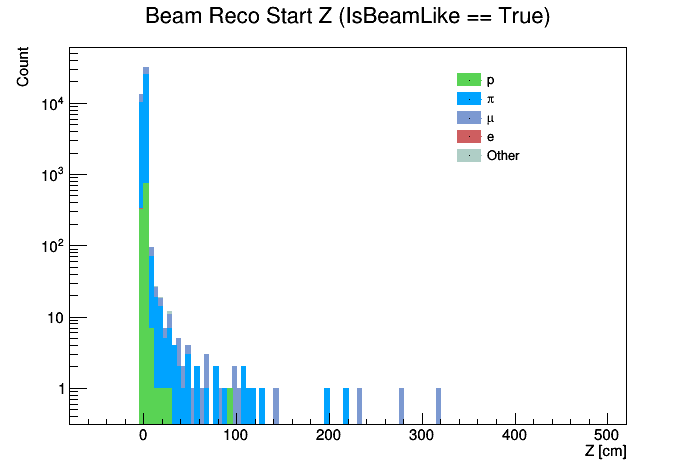

In [19]:
''' Reco Beam Start Z (SCE-corrected + Calibrated), remove events in Z = [28,32] ie IsBeamLike==1 '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 120
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, -80.0, 520.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, -80.0, 520.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, -80.0, 520.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, -80.0, 520.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, -80.0, 520.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_beam_calo_startZ >> h1b","reco_beam_true_byHits_PDG==2212" + tof_cut + beam_tpc_cut)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_beam_calo_startZ >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11)" + tof_cut + beam_tpc_cut)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_beam_calo_startZ >> h3b","reco_beam_true_byHits_PDG==211" + tof_cut + beam_tpc_cut)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_beam_calo_startZ >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13)" + tof_cut + beam_tpc_cut)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_beam_calo_startZ >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212" + tof_cut + beam_tpc_cut)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("Z [cm]")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Beam Reco Start Z (IsBeamLike == True)")
stacks.SetMinimum(1)


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

print(color_text)

positron : 105945
electron : 0
proton : 41350
pion : 39320
muon : 34783
other : 6938


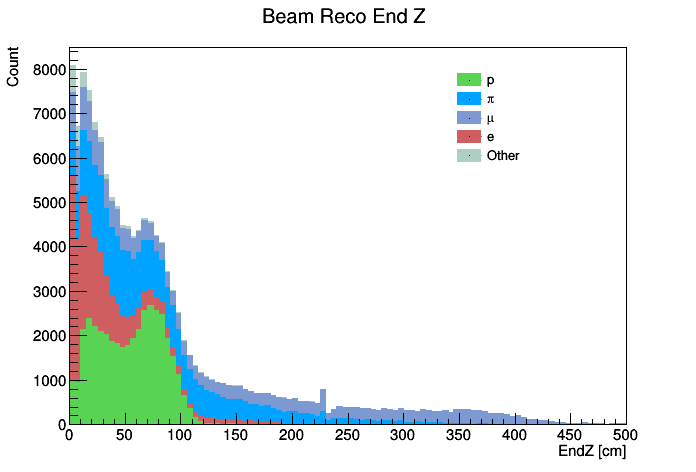

In [129]:
''' Reco Beam End Z (SCE-corrected + Calibrated) '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 100
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_beam_calo_endZ >> h1b","reco_beam_true_byHits_PDG==2212")
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_beam_calo_endZ >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11)")
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_beam_calo_endZ >> h3b","reco_beam_true_byHits_PDG==211")
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_beam_calo_endZ >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13)")
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_beam_calo_endZ >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212")
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("EndZ [cm]")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Beam Reco End Z")


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)


positron : 80
electron : 0
proton : 673
pion : 5688
muon : 990
other : 1149


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


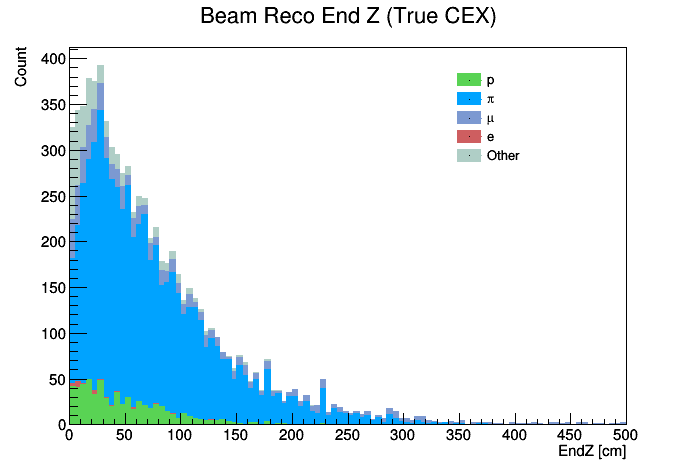

In [121]:
''' Reco Beam End Z (SCE-corrected + Calibrated) '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 100
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_beam_calo_endZ >> h1b","reco_beam_true_byHits_PDG==2212" + true_cex_def)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_beam_calo_endZ >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11)" + true_cex_def)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_beam_calo_endZ >> h3b","reco_beam_true_byHits_PDG==211" + true_cex_def)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_beam_calo_endZ >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13)" + true_cex_def)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_beam_calo_endZ >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212" + true_cex_def)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("EndZ [cm]")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Beam Reco End Z (True CEX)")


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

positron : 14
electron : 0
proton : 1067
pion : 35024
muon : 8974
other : 403


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


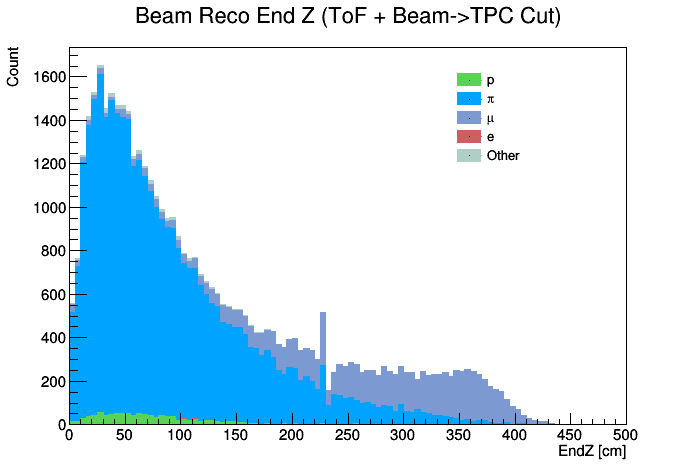

In [21]:
''' Reco Beam End Z (SCE-corrected + Calibrated) '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 100
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_beam_calo_endZ >> h1b","reco_beam_true_byHits_PDG==2212" + tof_cut + beam_tpc_cut)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_beam_calo_endZ >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11)" + tof_cut + beam_tpc_cut)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_beam_calo_endZ >> h3b","reco_beam_true_byHits_PDG==211" + tof_cut + beam_tpc_cut)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_beam_calo_endZ >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13)" + tof_cut + beam_tpc_cut)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_beam_calo_endZ >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212" + tof_cut + beam_tpc_cut)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("EndZ [cm]")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Beam Reco End Z (ToF + Beam->TPC Cut)")


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

positron : 14
electron : 0
proton : 1050
pion : 32609
muon : 2787
other : 402


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


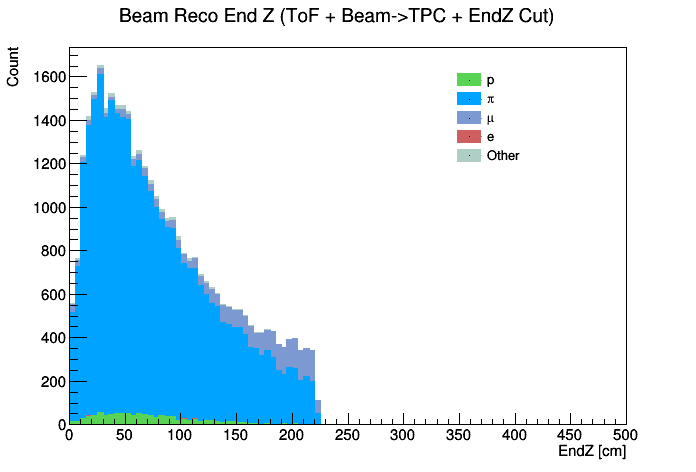

In [122]:
# reco_daughter_PFP_trackScore_collection
''' Reco Beam End Z (SCE-corrected + Calibrated) '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 100
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_beam_calo_endZ >> h1b","reco_beam_true_byHits_PDG==2212" + tof_cut + beam_tpc_cut + endz_cut)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_beam_calo_endZ >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11)" + tof_cut + beam_tpc_cut + endz_cut)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_beam_calo_endZ >> h3b","reco_beam_true_byHits_PDG==211" + tof_cut + beam_tpc_cut + endz_cut)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_beam_calo_endZ >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13)" + tof_cut + beam_tpc_cut + endz_cut)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_beam_calo_endZ >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212" + tof_cut + beam_tpc_cut + endz_cut)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("EndZ [cm]")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Beam Reco End Z (ToF + Beam->TPC + EndZ Cut)")


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

In [ ]:
# reco_daughter_PFP_trackScore_collection
''' Reco Beam Chi2 Proton '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

beam_

ccnue_bins = 200
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 0.0, 20000.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 0.0, 20000.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 0.0, 20000.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 0.0, 20000.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 0.0, 20000.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_beam_allTrack_Chi2_proton >> h1b","reco_beam_true_byHits_PDG==2212" + tof_cut + beam_tpc_cut + endz_cut)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_beam_allTrack_Chi2_proton >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11)" + tof_cut + beam_tpc_cut + endz_cut)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_beam_allTrack_Chi2_proton >> h3b","reco_beam_true_byHits_PDG==211" + tof_cut + beam_tpc_cut + endz_cut)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_beam_allTrack_Chi2_proton >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13)" + tof_cut + beam_tpc_cut + endz_cut)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_beam_allTrack_Chi2_proton >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212" + tof_cut + beam_tpc_cut + endz_cut)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("#chi^2 Proton")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("#chi^2 Proton (ToF + Beam->TPC + EndZ Cut)")


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

positron : 100295
electron : 0
proton : 56072
pion : 24710
muon : 49304
other : 34130


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


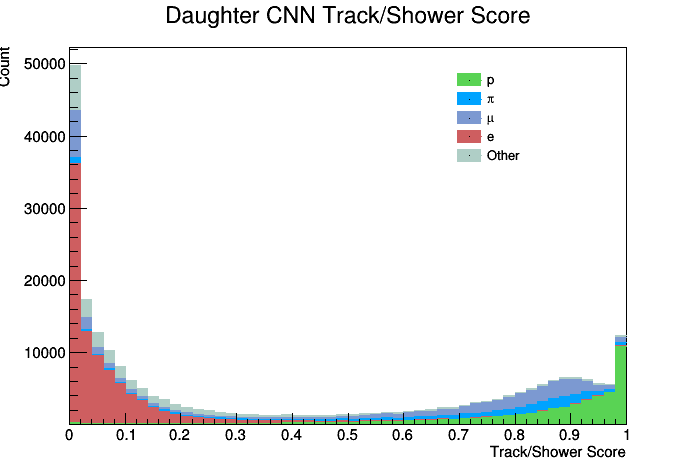

In [123]:
# reco_daughter_PFP_trackScore_collection
''' Reco Beam Daughter Track/Shower Score '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 50
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h1b","reco_daughter_PFP_true_byHits_PDG==2212")
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h2b","(reco_daughter_PFP_true_byHits_PDG==-11 || reco_daughter_PFP_true_byHits_PDG==11)")
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h3b","reco_daughter_PFP_true_byHits_PDG==211")
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h4b","(reco_daughter_PFP_true_byHits_PDG==-13 || reco_daughter_PFP_true_byHits_PDG==13)")
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h5b","reco_daughter_PFP_true_byHits_PDG!=-13 && reco_daughter_PFP_true_byHits_PDG!=13 && reco_daughter_PFP_true_byHits_PDG!=-11 && reco_daughter_PFP_true_byHits_PDG!=11 && reco_daughter_PFP_true_byHits_PDG!=211 && reco_daughter_PFP_true_byHits_PDG!=2212")
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("Track/Shower Score")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Daughter CNN Track/Shower Score")
stacks.SetMinimum(1)


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

positron : 1492
electron : 0
proton : 11979
pion : 9044
muon : 3014
other : 7516


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


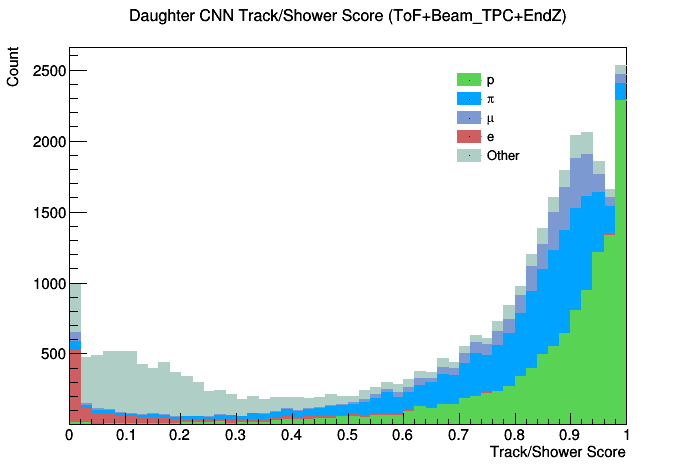

In [27]:
# reco_daughter_PFP_trackScore_collection
''' Reco Beam Daughter Track/Shower Score '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 50
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h1b","reco_daughter_PFP_true_byHits_PDG==2212" + tof_cut + beam_tpc_cut + endz_cut)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton']) 
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h2b","(reco_daughter_PFP_true_byHits_PDG==-11 || reco_daughter_PFP_true_byHits_PDG==11)" + tof_cut + beam_tpc_cut + endz_cut)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h3b","reco_daughter_PFP_true_byHits_PDG==211" + tof_cut + beam_tpc_cut + endz_cut)
h3 = rt.gROOT.FindObject("h3b")
hpi_daughter_track_score_cuml = h3.GetCumulative()
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h4b","(reco_daughter_PFP_true_byHits_PDG==-13 || reco_daughter_PFP_true_byHits_PDG==13)" + tof_cut + beam_tpc_cut + endz_cut)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h5b","reco_daughter_PFP_true_byHits_PDG!=-13 && reco_daughter_PFP_true_byHits_PDG!=13 && reco_daughter_PFP_true_byHits_PDG!=-11 && reco_daughter_PFP_true_byHits_PDG!=11 && reco_daughter_PFP_true_byHits_PDG!=211 && reco_daughter_PFP_true_byHits_PDG!=2212" + tof_cut + beam_tpc_cut + endz_cut)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("Track/Shower Score")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Daughter CNN Track/Shower Score (ToF+Beam_TPC+EndZ)")
stacks.SetMinimum(1)


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

positron : 275
electron : 0
proton : 11436
pion : 8481
muon : 2769
other : 2708


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


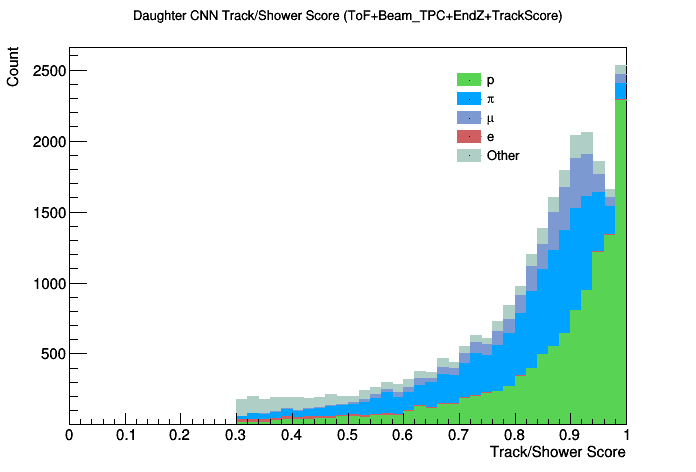

In [125]:
# reco_daughter_PFP_trackScore_collection
''' Reco Beam Daughter Track/Shower Score '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}


ccnue_bins = 50
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h1b","reco_daughter_PFP_true_byHits_PDG==2212" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h2b","(reco_daughter_PFP_true_byHits_PDG==-11 || reco_daughter_PFP_true_byHits_PDG==11)" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h3b","reco_daughter_PFP_true_byHits_PDG==211" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h4b","(reco_daughter_PFP_true_byHits_PDG==-13 || reco_daughter_PFP_true_byHits_PDG==13)" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h5b","reco_daughter_PFP_true_byHits_PDG!=-13 && reco_daughter_PFP_true_byHits_PDG!=13 && reco_daughter_PFP_true_byHits_PDG!=-11 && reco_daughter_PFP_true_byHits_PDG!=11 && reco_daughter_PFP_true_byHits_PDG!=211 && reco_daughter_PFP_true_byHits_PDG!=2212" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("Track/Shower Score")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Daughter CNN Track/Shower Score (ToF+Beam_TPC+EndZ+TrackScore)")
stacks.SetMinimum(1)


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

positron : 72093
electron : 0
proton : 22042
pion : 81442
muon : 81299
other : 7635


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


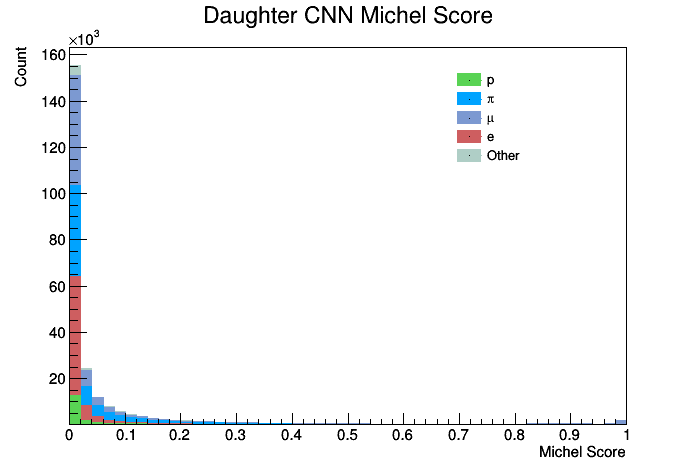

In [126]:
# reco_daughter_PFP_michelScore_collection
''' Reco Beam Daughter Michel Score '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 50
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_daughter_PFP_michelScore_collection >> h1b","reco_beam_true_byHits_PDG==2212")
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_daughter_PFP_michelScore_collection >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11)")
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_daughter_PFP_michelScore_collection >> h3b","reco_beam_true_byHits_PDG==211")
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_daughter_PFP_michelScore_collection >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13)")
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_daughter_PFP_michelScore_collection >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212")
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("Michel Score")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Daughter CNN Michel Score")
stacks.SetMinimum(1)


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

positron : 10
electron : 0
proton : 400
pion : 23778
muon : 1347
other : 134


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


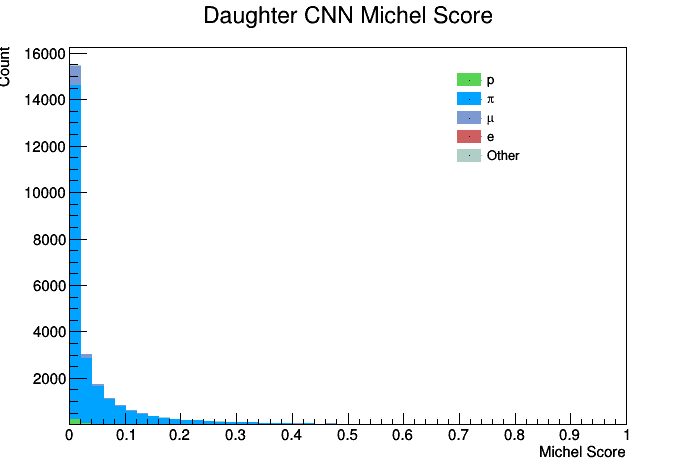

In [59]:
# reco_daughter_PFP_michelScore_collection
''' Reco Beam Daughter Michel Score '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 50
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_daughter_PFP_michelScore_collection >> h1b","reco_beam_true_byHits_PDG==2212" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_daughter_PFP_michelScore_collection >> h2b","(reco_beam_true_byHits_PDG==-11 || reco_beam_true_byHits_PDG==11)" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_daughter_PFP_michelScore_collection >> h3b","reco_beam_true_byHits_PDG==211" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_daughter_PFP_michelScore_collection >> h4b","(reco_beam_true_byHits_PDG==-13 || reco_beam_true_byHits_PDG==13)" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_daughter_PFP_michelScore_collection >> h5b","reco_beam_true_byHits_PDG!=-13 && reco_beam_true_byHits_PDG!=13 && reco_beam_true_byHits_PDG!=-11 && reco_beam_true_byHits_PDG!=11 && reco_beam_true_byHits_PDG!=211 && reco_beam_true_byHits_PDG!=2212" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("Michel Score")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Daughter CNN Michel Score")
stacks.SetMinimum(1)


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

positron : 72093
electron : 0
proton : 22042
pion : 81442
muon : 81299
other : 7635


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


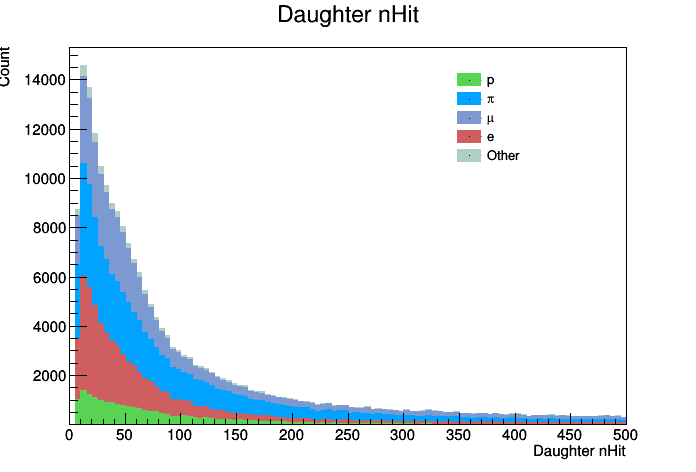

In [116]:
# reco_daughter_PFP_nHits

''' Reco Beam Daughter nHit '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 100
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_daughter_PFP_nHits >> h1b","reco_daughter_PFP_true_byHits_PDG==2212" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_daughter_PFP_nHits >> h2b","(reco_daughter_PFP_true_byHits_PDG==-11 || reco_daughter_PFP_true_byHits_PDG==11)" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_daughter_PFP_nHits >> h3b","reco_daughter_PFP_true_byHits_PDG==211" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_daughter_PFP_nHits >> h4b","(reco_daughter_PFP_true_byHits_PDG==-13 || reco_daughter_PFP_true_byHits_PDG==13)" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_daughter_PFP_nHits >> h5b","reco_daughter_PFP_true_byHits_PDG!=-13 && reco_daughter_PFP_true_byHits_PDG!=13 && reco_daughter_PFP_true_byHits_PDG!=-11 && reco_daughter_PFP_true_byHits_PDG!=11 && reco_daughter_PFP_true_byHits_PDG!=211 && reco_daughter_PFP_true_byHits_PDG!=2212")
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("Daughter nHit")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Daughter nHit")
stacks.SetMinimum(1)


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

positron : 332
electron : 0
proton : 4298
pion : 1288
muon : 1995
other : 115
gamma : 12169


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h6b (Potential memory leak).


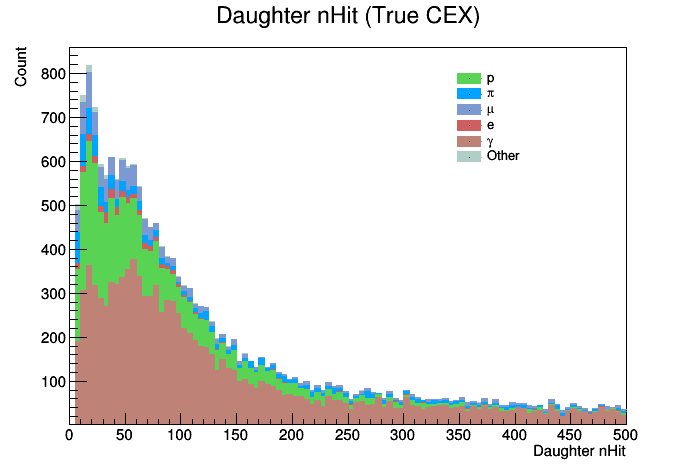

In [61]:
# reco_daughter_PFP_nHits

''' Reco Beam Daughter nHit '''

#count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 100
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )
h6b = TH1I('h6b','muon;CC#nu_e Score', ccnue_bins, 0.0, 500.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['gamma'] = ptree.Draw("reco_daughter_PFP_nHits >> h6b","reco_daughter_PFP_true_byHits_PDG==22" + true_cex_def)
h6 = rt.gROOT.FindObject("h6b")
set_hist_colors(h6, 45, colors['gamma'])
stacks.Add(h6,"HIST")

count['proton'] = ptree.Draw("reco_daughter_PFP_nHits >> h1b","reco_daughter_PFP_true_byHits_PDG==2212" + true_cex_def)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_daughter_PFP_nHits >> h2b","(reco_daughter_PFP_true_byHits_PDG==-11 || reco_daughter_PFP_true_byHits_PDG==11)" + true_cex_def)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_daughter_PFP_nHits >> h3b","reco_daughter_PFP_true_byHits_PDG==211" + true_cex_def)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_daughter_PFP_nHits >> h4b","(reco_daughter_PFP_true_byHits_PDG==-13 || reco_daughter_PFP_true_byHits_PDG==13)" + true_cex_def)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_daughter_PFP_nHits >> h5b","reco_daughter_PFP_true_byHits_PDG!=-13 && reco_daughter_PFP_true_byHits_PDG!=13 && reco_daughter_PFP_true_byHits_PDG!=-11 && reco_daughter_PFP_true_byHits_PDG!=11 && reco_daughter_PFP_true_byHits_PDG!=211 && reco_daughter_PFP_true_byHits_PDG!=2212 && reco_daughter_PFP_true_byHits_PDG!=22" + true_cex_def)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("Daughter nHit")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Daughter nHit (True CEX)")
stacks.SetMinimum(1)


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h6b","#gamma")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

positron : 275
electron : 0
proton : 11436
pion : 8481
muon : 2769
other : 2708


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


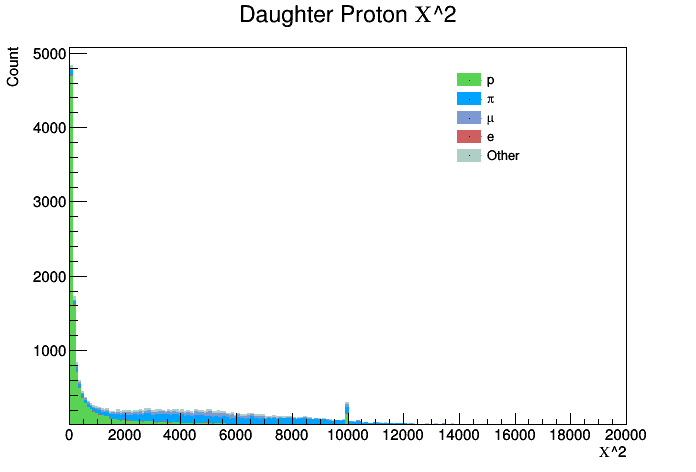

In [52]:
# reco_daughter_PFP_nHits

''' Reco Beam Daughter nHit '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 200
h1b = TH1I('h1b','proton;CC#nu_e Score', ccnue_bins, 0.0, 20000.0 )
h2b = TH1I('h2b','electron;CC#nu_e Score', ccnue_bins, 0.0, 20000.0 )
h3b = TH1I('h3b','pion;CC#nu_e Score', ccnue_bins, 0.0, 20000.0 )
h4b = TH1I('h4b','muon;CC#nu_e Score', ccnue_bins, 0.0, 20000.0 )
h5b = TH1I('h5b','muon;CC#nu_e Score', ccnue_bins, 0.0, 20000.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_daughter_allTrack_Chi2_proton >> h1b","reco_daughter_PFP_true_byHits_PDG==2212" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h1 = rt.gROOT.FindObject("h1b")
hp_chi = h1.GetCumulative()
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_daughter_allTrack_Chi2_proton >> h2b","(reco_daughter_PFP_true_byHits_PDG==-11 || reco_daughter_PFP_true_byHits_PDG==11)" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_daughter_allTrack_Chi2_proton >> h3b","reco_daughter_PFP_true_byHits_PDG==211" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h3 = rt.gROOT.FindObject("h3b")
hpi_chi = h3.GetCumulative()
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_daughter_allTrack_Chi2_proton >> h4b","(reco_daughter_PFP_true_byHits_PDG==-13 || reco_daughter_PFP_true_byHits_PDG==13)" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_daughter_allTrack_Chi2_proton >> h5b","reco_daughter_PFP_true_byHits_PDG!=-13 && reco_daughter_PFP_true_byHits_PDG!=13 && reco_daughter_PFP_true_byHits_PDG!=-11 && reco_daughter_PFP_true_byHits_PDG!=11 && reco_daughter_PFP_true_byHits_PDG!=211 && reco_daughter_PFP_true_byHits_PDG!=2212" + tof_cut + beam_tpc_cut + endz_cut + track_score)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("#chi^2")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Daughter Proton #chi^2")
stacks.SetMinimum(1)


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

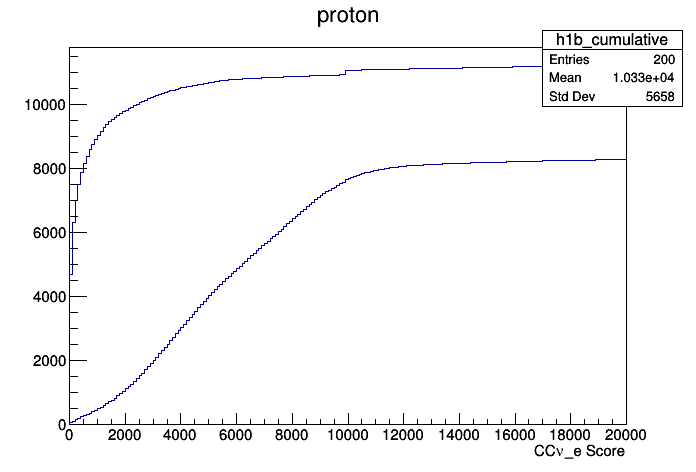

In [53]:
c = rt.TCanvas()

hp_chi.Draw("SAME")
hpi_chi.Draw("SAME")

hp_chi.SetMinimum(0)

c.Draw()

positron : 152
electron : 0
proton : 1345
pion : 7021
muon : 2169
other : 1143
gamma : 778


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h6b (Potential memory leak).


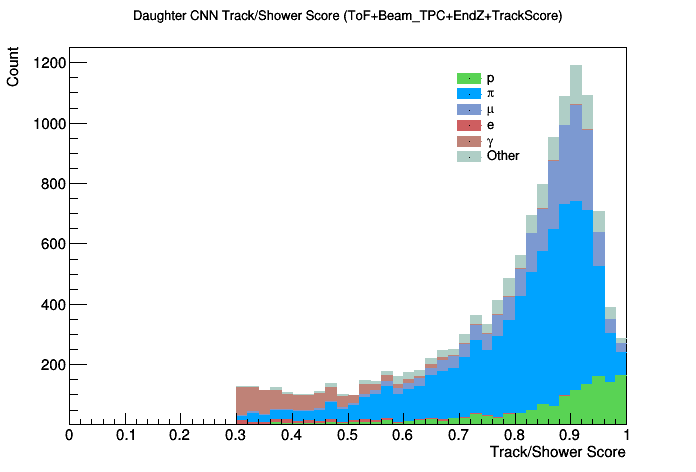

In [67]:
# reco_daughter_PFP_trackScore_collection
''' Reco Beam End Z (SCE-corrected + Calibrated) '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

chi2_cut = " && reco_daughter_allTrack_Chi2_proton>2500 "

ccnue_bins = 50
h1b = TH1D('h1b','proton;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h2b = TH1D('h2b','electron;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h3b = TH1D('h3b','pion;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h4b = TH1D('h4b','muon;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h5b = TH1D('h5b','muon;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h6b = TH1D('h6b','muon;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h1b","reco_daughter_PFP_true_byHits_PDG==2212" + tof_cut + beam_tpc_cut + endz_cut + track_score + chi2_cut)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h2b","(reco_daughter_PFP_true_byHits_PDG==-11 || reco_daughter_PFP_true_byHits_PDG==11)" + tof_cut + beam_tpc_cut + endz_cut + track_score + chi2_cut)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h3b","reco_daughter_PFP_true_byHits_PDG==211" + tof_cut + beam_tpc_cut + endz_cut + track_score + chi2_cut)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h4b","(reco_daughter_PFP_true_byHits_PDG==-13 || reco_daughter_PFP_true_byHits_PDG==13)" + tof_cut + beam_tpc_cut + endz_cut + track_score + chi2_cut)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['gamma'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h6b","reco_daughter_PFP_true_byHits_PDG==22" + tof_cut + beam_tpc_cut + endz_cut + track_score + chi2_cut)
h6 = rt.gROOT.FindObject("h6b")
set_hist_colors(h6, colors['gamma'], colors['gamma'])
stacks.Add(h6,"HIST")

count['other'] = ptree.Draw("reco_daughter_PFP_trackScore_collection >> h5b","reco_daughter_PFP_true_byHits_PDG!=-13 && reco_daughter_PFP_true_byHits_PDG!=13 && reco_daughter_PFP_true_byHits_PDG!=-11 && reco_daughter_PFP_true_byHits_PDG!=11 && reco_daughter_PFP_true_byHits_PDG!=211 && reco_daughter_PFP_true_byHits_PDG!=2212 && reco_daughter_PFP_true_byHits_PDG!=22" + tof_cut + beam_tpc_cut + endz_cut + track_score + chi2_cut)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("Track/Shower Score")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Daughter CNN Track/Shower Score (ToF+Beam_TPC+EndZ+TrackScore)")
stacks.SetMinimum(1)


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h6b", "#gamma")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)

positron : 152
electron : 0
proton : 1345
pion : 7021
muon : 2169
other : 1921


Warning in <TFile::Append>: Replacing existing TH1: h1b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4b (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5b (Potential memory leak).


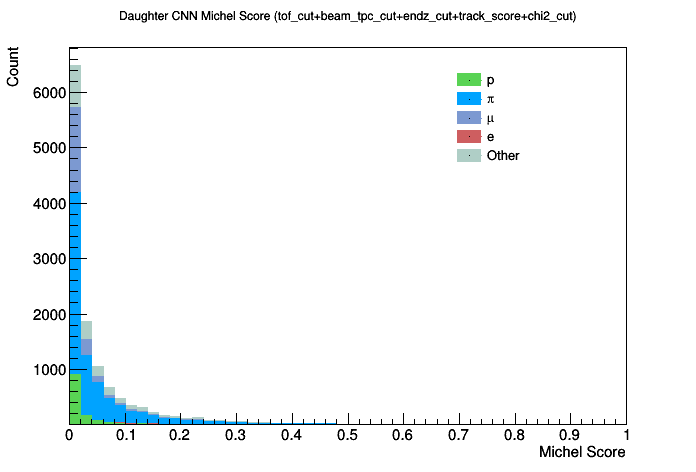

In [74]:
# reco_daughter_PFP_michelScore_collection
''' Reco Beam Daughter Michel Score '''

count = {'positron': 0, 'electron': 0, 'proton': 0, 'pion': 0, 'muon': 0, 'other': 0}

ccnue_bins = 50
h1b = TH1D('h1b','proton;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h2b = TH1D('h2b','electron;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h3b = TH1D('h3b','pion;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h4b = TH1D('h4b','muon;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )
h5b = TH1D('h5b','muon;CC#nu_e Score', ccnue_bins, 0.0, 1.0 )

c = rt.TCanvas()
leg = legend_init_right()

stacks = rt.THStack()

count['proton'] = ptree.Draw("reco_daughter_PFP_michelScore_collection >> h1b","reco_daughter_PFP_true_byHits_PDG==2212" + tof_cut + beam_tpc_cut + endz_cut + track_score + chi2_cut)
h1 = rt.gROOT.FindObject("h1b")
set_hist_colors(h1, 8, colors['proton'])
stacks.Add(h1,"HIST")

stack = rt.THStack()
count['positron'] = ptree.Draw("reco_daughter_PFP_michelScore_collection >> h2b","(reco_daughter_PFP_true_byHits_PDG==-11 || reco_daughter_PFP_true_byHits_PDG==11)" + tof_cut + beam_tpc_cut + endz_cut + track_score + chi2_cut)
h2 = rt.gROOT.FindObject("h2b")
set_hist_colors(h2, 46, colors['positron'])
stacks.Add(h2,"HIST")

count['pion'] = ptree.Draw("reco_daughter_PFP_michelScore_collection >> h3b","reco_daughter_PFP_true_byHits_PDG==211" + tof_cut + beam_tpc_cut + endz_cut + track_score + chi2_cut)
h3 = rt.gROOT.FindObject("h3b")
set_hist_colors(h3, 64, colors['pion'])
stacks.Add(h3,"HIST")

count['muon'] = ptree.Draw("reco_daughter_PFP_michelScore_collection >> h4b","(reco_daughter_PFP_true_byHits_PDG==-13 || reco_daughter_PFP_true_byHits_PDG==13)" + tof_cut + beam_tpc_cut + endz_cut + track_score + chi2_cut)
h4 = rt.gROOT.FindObject("h4b")
set_hist_colors(h4, 38, colors['muon'])
stacks.Add(h4,"HIST")

count['other'] = ptree.Draw("reco_daughter_PFP_michelScore_collection >> h5b","reco_daughter_PFP_true_byHits_PDG!=-13 && reco_daughter_PFP_true_byHits_PDG!=13 && reco_daughter_PFP_true_byHits_PDG!=-11 && reco_daughter_PFP_true_byHits_PDG!=11 && reco_daughter_PFP_true_byHits_PDG!=211 && reco_daughter_PFP_true_byHits_PDG!=2212" + tof_cut + beam_tpc_cut + endz_cut + track_score + chi2_cut)
h5 = rt.gROOT.FindObject("h5b")
set_hist_colors(h5, colors['other'], colors['other'])
stacks.Add(h5,"HIST")


stacks.Draw()

stacks.GetXaxis().SetTitle("Michel Score")
stacks.GetYaxis().SetTitle("Count")
stacks.SetTitle("Daughter CNN Michel Score (tof_cut+beam_tpc_cut+endz_cut+track_score+chi2_cut)")
stacks.SetMinimum(1)


leg.AddEntry("h1b", "p")
leg.AddEntry("h3b", "#pi")
leg.AddEntry("h4b", "#mu")
leg.AddEntry("h2b", "e")
leg.AddEntry("h5b", "Other")
leg.Draw()

#rt.gPad.SetLogy(True)
c.Draw("SAME")

print_count(count)